✅ GIF guardado como 'grua_cinematica_inversa.gif'


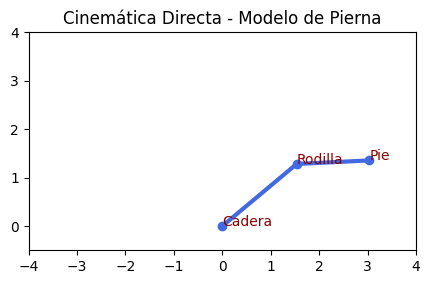

In [4]:
# ============================================
# Práctica 3 - Punto 1: Cinemática Directa
# Autor: Guillermo Moya Romero
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parámetros del modelo ---
# Longitudes de los segmentos (muslo y pierna)
L1, L2 = 2, 1.5

# Función de Cinemática Directa
def forward_kinematics(theta1, theta2):
    """
    Calcula las coordenadas de las articulaciones
    a partir de los ángulos de las juntas.
    """
    # Articulación de la rodilla
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)

    # Posición del pie
    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)

    return (0, x1, x2), (0, y1, y2)

# --- Configuración de la figura ---
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-4, 4)
ax.set_ylim(-0.5, 4)
ax.set_aspect('equal')
ax.set_title("Cinemática Directa - Modelo de Pierna")

# Línea que representa la pierna
line, = ax.plot([], [], 'o-', lw=3, color='royalblue')
joint_labels = [ax.text(0, 0, '', fontsize=10, color='darkred') for _ in range(3)]

# --- Función de actualización por frame ---
def update(frame):
    # Definimos los ángulos en función del tiempo
    theta1 = np.deg2rad(40 * np.sin(frame / 15))   # Cadera
    theta2 = np.deg2rad(60 * np.sin(frame / 10))   # Rodilla

    x, y = forward_kinematics(theta1, theta2)
    line.set_data(x, y)

    # Etiquetas para cada articulación
    joint_names = ["Cadera", "Rodilla", "Pie"]
    for i, txt in enumerate(joint_labels):
        txt.set_position((x[i], y[i]))
        txt.set_text(joint_names[i])

    return line, *joint_labels

# --- Crear animación ---
ani = FuncAnimation(fig, update, frames=120, interval=80, blit=True)

# Mostrar animación en pantalla
HTML(ani.to_jshtml())

# --- Guardar animación como GIF ---
ani.save('grua_cinematica_inversa.gif', writer='pillow', fps=30)
print("✅ GIF guardado como 'grua_cinematica_inversa.gif'")



Punto 2


✅ GIF guardado como 'grua_cinematica_inversa.gif'


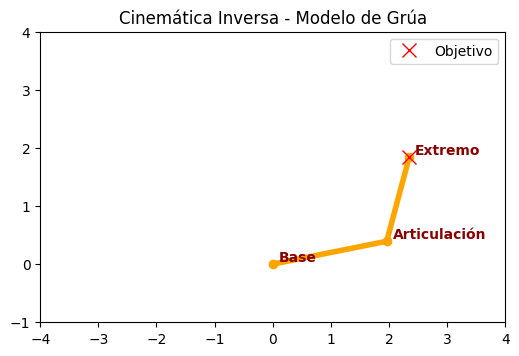

In [5]:
# ============================================
# Práctica 3 - Punto 2: Cinemática Inversa
# Autor: Guillermo Moya Romero
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parámetros del modelo ---
L1, L2 = 2.0, 1.5  # Longitudes de los segmentos (base y brazo)
base = (0, 0)

# --- Cinemática Inversa ---
def inverse_kinematics(x_target, y_target):
    """
    Calcula los ángulos theta1 y theta2 que permiten alcanzar el punto (x, y)
    usando el método geométrico de la ley de cosenos.
    """
    # Distancia al objetivo
    r = np.sqrt(x_target**2 + y_target**2)
    r = np.clip(r, 1e-6, L1 + L2 - 1e-3)  # Evita errores por fuera del alcance

    # Ángulo de la segunda articulación
    cos_theta2 = (r**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2 = np.arccos(np.clip(cos_theta2, -1, 1))

    # Ángulo de la primera articulación
    phi = np.arctan2(y_target, x_target)
    psi = np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))
    theta1 = phi - psi

    return theta1, theta2

# --- Cinemática Directa (para visualizar) ---
def forward_kinematics(theta1, theta2):
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)
    return (0, x1, x2), (0, y1, y2)

# --- Configuración del gráfico ---
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')
ax.set_title("Cinemática Inversa - Modelo de Grúa")

line, = ax.plot([], [], 'o-', lw=4, color='orange')
target_point, = ax.plot([], [], 'rx', markersize=10, label="Objetivo")
ax.legend(loc="upper right")
joint_labels = [ax.text(0, 0, '', fontsize=10, color='darkred', fontweight='bold') for _ in range(3)]

# --- Animación ---
def update(frame):
    # Movimiento del objetivo en el tiempo (trayectoria circular)
    x_target = 2.5 * np.cos(frame / 30)
    y_target = 1.5 + 1.0 * np.sin(frame / 30)

    # Resolver cinemática inversa
    theta1, theta2 = inverse_kinematics(x_target, y_target)

    # Calcular posiciones reales
    x, y = forward_kinematics(theta1, theta2)
    line.set_data(x, y)
    target_point.set_data([x_target], [y_target])

    # Etiquetas
    joint_names = ["Base", "Articulación", "Extremo"]
    for i, txt in enumerate(joint_labels):
        txt.set_position((x[i] + 0.1, y[i] + 0.05))
        txt.set_text(joint_names[i])

    return line, target_point, *joint_labels

ani = FuncAnimation(fig, update, frames=200, interval=60, blit=True)
HTML(ani.to_jshtml())

# --- Guardar animación como GIF ---
ani.save('grua_cinematica_inversa1.gif', writer='pillow', fps=30)
print("✅ GIF guardado como 'grua_cinematica_inversa.gif'")


✅ GIF guardado como 'grua_cinematica_inversa.gif'


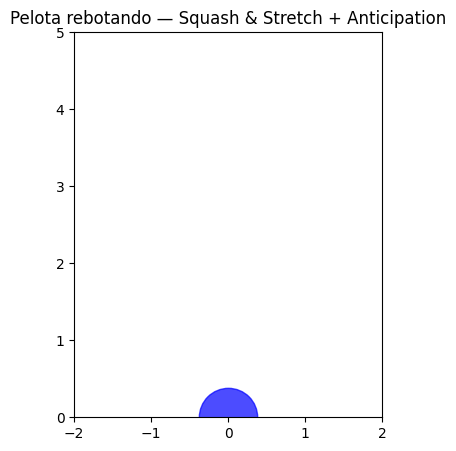

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# -------------------------
# Principios: Squash & Stretch + Anticipation
# -------------------------
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.set_title("Pelota rebotando — Squash & Stretch + Anticipation")

# Crear la pelota
(ball,) = ax.plot([], [], 'o', color='blue', alpha=0.7, markersize=30)

# Tiempo simulado
t_vals = np.linspace(0, 6*np.pi, 200)

# Función de animación
def animate_ball(i):
    t = t_vals[i % len(t_vals)]
    y = abs(np.sin(t)) * 4  # rebote
    squash = 1 + 0.4 * np.cos(2*t)  # compresión/estiramiento
    ball.set_markersize(30 * squash)
    ball.set_data([0], [y])  # ⚠️ Debe recibir secuencias, no valores sueltos
    return (ball,)

# Crear la animación
ani3 = FuncAnimation(fig, animate_ball, frames=len(t_vals), interval=50, blit=True)

# Mostrar en Colab
HTML(ani3.to_jshtml())

# --- Guardar animación como GIF ---
ani3.save('grua_cinematica_inversa2.gif', writer='pillow', fps=30)
print("✅ GIF guardado como 'grua_cinematica_inversa.gif'")

